In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import nltk
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Eluvio_DS_Challenge.csv')
df

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
...,...,...,...,...,...,...,...,...
509231,1479816764,2016-11-22,5,0,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory,worldnews
509232,1479816772,2016-11-22,1,0,There are people speculating that this could b...,False,SummerRay,worldnews
509233,1479817056,2016-11-22,1,0,Professor receives Arab Researchers Award,False,AUSharjah,worldnews
509234,1479817157,2016-11-22,1,0,Nigel Farage attacks response to Trump ambassa...,False,smilyflower,worldnews


In [3]:
df['up_votes'].max()

21253

**Top 10 articles with most number of upvotes**

In [4]:
# Top 10 articles with most number of upvotes 
df[df['up_votes']<=21253].sort_values(by='up_votes', ascending=False).head(10)

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
377200,1434818471,2015-06-20,21253,0,A biotech startup has managed to 3-D print fak...,False,KRISHNA53,worldnews
391415,1440421079,2015-08-24,13435,0,Twitter has forced 30 websites that archive po...,False,joeyoungblood,worldnews
450818,1459706506,2016-04-03,13244,0,2.6 terabyte leak of Panamanian shell company ...,False,mister_geaux,worldnews
391318,1440367768,2015-08-23,12333,0,The police officer who leaked the footage of t...,False,navysealassulter,worldnews
390252,1439939168,2015-08-18,11288,0,Paris shooting survivor suing French media for...,False,seapiglet,worldnews
449809,1459336773,2016-03-30,11108,0,Hundreds of thousands of leaked emails reveal ...,False,Xiroth,worldnews
397215,1442535288,2015-09-18,10922,0,Brazil s Supreme Court has banned corporate co...,False,DoremusJessup,worldnews
390494,1440030633,2015-08-20,10515,0,ISIS beheads 81-year-old pioneer archaeologist...,False,DawgsOnTopUGA,worldnews
500786,1476881235,2016-10-19,10394,0,Feeding cows seaweed could slash global greenh...,False,mvea,worldnews
388230,1438963135,2015-08-07,10377,0,Brazilian radio host famous for exposing corru...,False,fiffers,worldnews


In [5]:
#There are 500720 unique articles 
df['title'].nunique()

500720

But there are 509236 rows which indicates few articles are repeated. Let's check if same article is written by different authors

In [6]:
# There are about 8600 unique authors
df['author'].nunique()

85838

In [7]:
df[df['title']=='Brutality of Syrian Rebels Posing Dilemma in West']

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
210607,1378383474,2013-09-05,19,0,Brutality of Syrian Rebels Posing Dilemma in West,False,Jewpiter,worldnews
210632,1378390466,2013-09-05,28,0,Brutality of Syrian Rebels Posing Dilemma in West,False,0x0E,worldnews
210685,1378398812,2013-09-05,7,0,Brutality of Syrian Rebels Posing Dilemma in West,False,emr1028,worldnews
210720,1378405690,2013-09-05,12,0,Brutality of Syrian Rebels Posing Dilemma in West,False,erowidtrance,worldnews
210805,1378426373,2013-09-06,31,0,Brutality of Syrian Rebels Posing Dilemma in West,False,GreyMatter22,worldnews
210806,1378426406,2013-09-06,57,0,Brutality of Syrian Rebels Posing Dilemma in West,False,BillTowne,worldnews


In [8]:
df[df['title']=='Ex-Blackwater Guards Sentenced to Prison in 2007 Killings of Iraqi Civilians']

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
360682,1428956706,2015-04-13,2,0,Ex-Blackwater Guards Sentenced to Prison in 20...,False,nictalks,worldnews
360684,1428956874,2015-04-13,3,0,Ex-Blackwater Guards Sentenced to Prison in 20...,False,zsreport,worldnews
360685,1428956934,2015-04-13,0,0,Ex-Blackwater Guards Sentenced to Prison in 20...,False,Concise_Pirate,worldnews
360686,1428956941,2015-04-13,4,0,Ex-Blackwater Guards Sentenced to Prison in 20...,False,therefore4,worldnews
360721,1428966119,2015-04-13,0,0,Ex-Blackwater Guards Sentenced to Prison in 20...,False,MBassist,worldnews


Therefore from the above we can see that articles with same titles have been written by different authors

In [9]:
df.dtypes

time_created     int64
date_created    object
up_votes         int64
down_votes       int64
title           object
over_18           bool
author          object
category        object
dtype: object

In [10]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [11]:
for i in ['date_created','time_created']:
    change_into_datetime(i)

In [12]:
df.dtypes

time_created    datetime64[ns]
date_created    datetime64[ns]
up_votes                 int64
down_votes               int64
title                   object
over_18                   bool
author                  object
category                object
dtype: object

**Top 10 authors with most number of upvotes**

In [13]:
# Top 10 authors with most number of upvotes 
df1=df.groupby(['author']).sum()
df1.sort_values(by='up_votes',ascending=False).head(10).reset_index()

,author,up_votes,down_votes,over_18
0,maxwellhill,1985416,0,0
1,anutensil,1531544,0,0
2,Libertatea,832102,0,1
3,DoremusJessup,584380,0,0
4,Wagamaga,580121,0,0
5,NinjaDiscoJesus,492582,0,1
6,madazzahatter,428966,0,0
7,madam1,390541,0,0
8,davidreiss666,338306,0,0
9,kulkke,333311,0,0


In [14]:
df['down_votes'].value_counts()

0    509236
Name: down_votes, dtype: int64

As there are no downvotes at all we can drop that column

In [15]:
df['category'].value_counts()

worldnews    509236
Name: category, dtype: int64

As there is only one category world_news. We can drop it too

In [16]:
df['over_18'].value_counts()

False    508916
True        320
Name: over_18, dtype: int64

In [17]:
df.drop(columns=['down_votes','category', 'time_created'], inplace=True)

In [18]:
df

,date_created,up_votes,title,over_18,author
0,2008-01-25,3,Scores killed in Pakistan clashes,False,polar
1,2008-01-25,2,Japan resumes refuelling mission,False,polar
2,2008-01-25,3,US presses Egypt on Gaza border,False,polar
3,2008-01-25,1,Jump-start economy: Give health care to all,False,fadi420
4,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans
...,...,...,...,...,...
509231,2016-11-22,5,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory
509232,2016-11-22,1,There are people speculating that this could b...,False,SummerRay
509233,2016-11-22,1,Professor receives Arab Researchers Award,False,AUSharjah
509234,2016-11-22,1,Nigel Farage attacks response to Trump ambassa...,False,smilyflower


Changing date created and time created into time stamps from objects

 **Creating a model which can predict whether an article is over 18 or not**

In [19]:
x=df['title']
y=df['over_18']

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')

In [21]:
X_c = tfidf.fit_transform(x)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X_c,y,train_size=0.7)

In [24]:
y_test.value_counts()

False    152682
True         89
Name: over_18, dtype: int64

In [25]:
## Random Over Sampling to handle the imbalance in the data
from imblearn.over_sampling import RandomOverSampler

In [26]:
os =  RandomOverSampler()

In [27]:
X_train_res, y_train_res = os.fit_resample(X_c, y)

In [28]:
X_train_res.shape,y_train_res.shape

((1017832, 87673), (1017832,))

In [29]:
from collections import Counter

In [30]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({False: 508916, True: 320})
Resampled dataset shape Counter({False: 508916, True: 508916})


In [31]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

In [32]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log=  LogisticRegression()

In [65]:
clf=GridSearchCV(estimator=log,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_res,y_train_res)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.99540975        nan 0.99749171        nan 0.99885541
        nan 0.99938005        nan 0.99954904]
  category=UserWarning
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [66]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[152672     10]
 [     0     89]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    152682
        True       0.90      1.00      0.95        89

    accuracy                           1.00    152771
   macro avg       0.95      1.00      0.97    152771
weighted avg       1.00      1.00      1.00    152771

0.999934542550615


**Using NLTK VADER package to perform Sentiment analysis and plot it to see the change over the years.**

In [38]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [39]:
!pip install NRCLex

     |████████████████████████████████| 396 kB 4.6 MB/s eta 0:00:01
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43309 sha256=c8c5d18a93f7e72c83e65824e24405226457020a930ababc73e92d4e8a406ccc
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built NRCLex


In [40]:
from nrclex import NRCLex

 If compound score is larger than 0.05, the title gets classified as positive; If compound score is smaller than -0.05 it gets classified as negative.

In [41]:
#create polarity scores
df['senti_score'] = df['title'].apply(lambda headline: sia.polarity_scores(headline))

#extract compound scores to a new column
df['compound']  = df['senti_score'].apply(lambda score_dict: score_dict['compound'])

#create a new column for sentiment labels 
df['senti_label'] = df['compound'].apply(lambda c: 'positive' if c >=0.05 else 'neutral' if c>-0.05 else 'negative')

#counts of sentiment labels
df['senti_label'].value_counts()

negative    266469
neutral     144471
positive     98296
Name: senti_label, dtype: int64

In [42]:
#calculate the average compound scores per month and per year respectively
yearly_averages = df.resample('A',on='date_created').mean()
monthly_averages = df.resample('M',on='date_created').mean()

In [43]:
yearly_averages.head()

,up_votes,over_18,compound
date_created,,,
2008-12-31,15.823906,0.000267,-0.176997
2009-12-31,25.697511,0.000438,-0.172330
2010-12-31,38.427444,0.000257,-0.198445
2011-12-31,53.979581,0.001543,-0.214364
2012-12-31,92.048355,0.000516,-0.222493


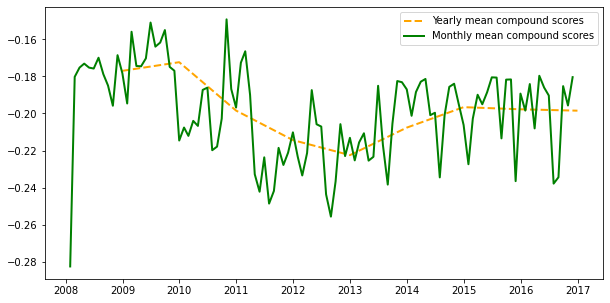

In [64]:
#visualization of vader sentiment scores
plt.figure(figsize=(10,5))
plt.plot(yearly_averages.index,yearly_averages['compound'],  color='orange', linewidth=2, linestyle='dashed', label='Yearly mean compound scores')
plt.plot(monthly_averages.index, monthly_averages['compound'], color = 'green', linewidth=2, label='Monthly mean compound scores')
plt.legend()
plt.show()

In [45]:
#function to retrieve nrc affect frequencies
def emotion_freq(headline):
    res1 = {'anger': 0.0, 'fear': 0.0, 'negative': 0.0, 'positive': 0.0, 'sadness': 0.0, 'trust': 0.0, 'anticipation': 0.0, 'joy': 0.0, 'disgust': 0.0, 'surprise': 0.0}
    headline = NRCLex(headline)
    freq = headline.affect_frequencies
    for k, fq in freq.items():
      res1[k] = res1.get(k, 0.0) + fq
    return res1

#function to calculate word count in each headline
def word_count(row):
    row = nltk.word_tokenize(row)
    cnt = len(row)
    return cnt

In [46]:
#create a new dataset without vader analysis
df_new = df.iloc[:,0:6].copy()

In [47]:
#retrieve affect frequencies in each headline
df_new['emo_freq']=df_new['title'].apply(emotion_freq)

In [49]:
df_new.head()

,date_created,up_votes,title,over_18,author,senti_score,emo_freq
0,2008-01-25,3,Scores killed in Pakistan clashes,False,polar,"{'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'comp...","{'anger': 0.0, 'fear': 0.0, 'negative': 0.0, '..."
1,2008-01-25,2,Japan resumes refuelling mission,False,polar,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'anger': 0.0, 'fear': 0.0, 'negative': 0.0, '..."
2,2008-01-25,3,US presses Egypt on Gaza border,False,polar,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'anger': 0.0, 'fear': 0.0, 'negative': 0.0, '..."
3,2008-01-25,1,Jump-start economy: Give health care to all,False,fadi420,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...","{'anger': 0.0, 'fear': 0.0, 'negative': 0.0, '..."
4,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans,"{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'comp...","{'anger': 0.0, 'fear': 0.5, 'negative': 0.5, '..."


In [50]:
#extract out the emotions to new columns for further analysis
df_new = pd.concat((df_new.drop(['emo_freq'],axis=1), df_new['emo_freq'].apply(pd.Series)), axis=1)

In [51]:
#calculate word count in each headline
df_new['word_count']=df_new['title'].apply(word_count)

In [52]:
df_new.head()

,date_created,up_votes,title,over_18,author,senti_score,anger,fear,negative,positive,sadness,trust,anticipation,joy,disgust,surprise,anticip,word_count
0,2008-01-25,3,Scores killed in Pakistan clashes,False,polar,"{'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'comp...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2008-01-25,2,Japan resumes refuelling mission,False,polar,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,2008-01-25,3,US presses Egypt on Gaza border,False,polar,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
3,2008-01-25,1,Jump-start economy: Give health care to all,False,fadi420,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8
4,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans,"{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'comp...",0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [53]:
#normalize emotion frequencies by having it divided by word counts in each headline
emotions = ['anger','fear','negative','positive','sadness','trust','anticipation','joy','disgust','surprise']
for emotion in emotions:
    df_new[emotion] = df_new[emotion]/df_new['word_count']

In [54]:
#now we have our dataframe as below
df_new.head()

,date_created,up_votes,title,over_18,author,senti_score,anger,fear,negative,positive,sadness,trust,anticipation,joy,disgust,surprise,anticip,word_count
0,2008-01-25,3,Scores killed in Pakistan clashes,False,polar,"{'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'comp...",0.0,0.000000,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,5
1,2008-01-25,2,Japan resumes refuelling mission,False,polar,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000000,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,4
2,2008-01-25,3,US presses Egypt on Gaza border,False,polar,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000000,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,6
3,2008-01-25,1,Jump-start economy: Give health care to all,False,fadi420,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...",0.0,0.000000,0.000000,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,8
4,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans,"{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'comp...",0.0,0.055556,0.055556,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,9


In [55]:
new_yearly_averages = df_new.resample('A',on='date_created').mean()
new_monthly_averages = df_new.resample('M',on='date_created').mean()

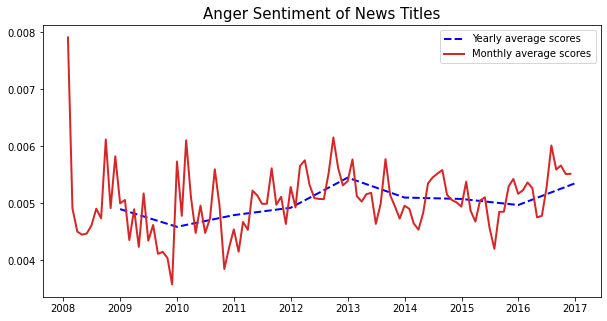

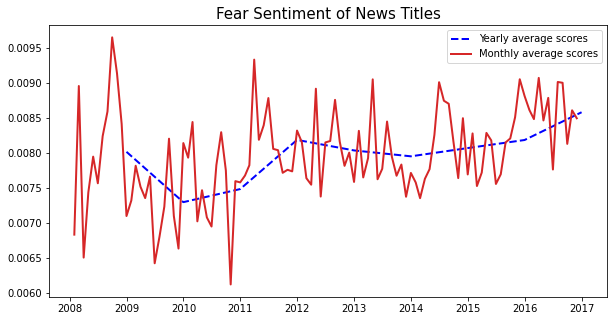

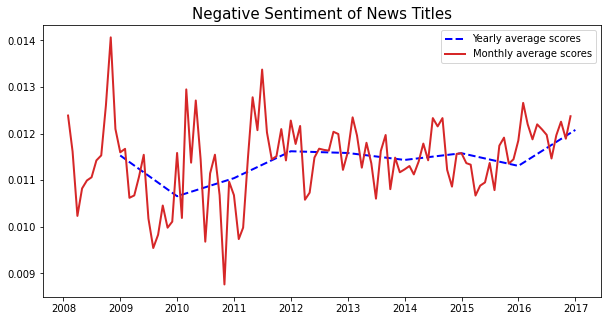

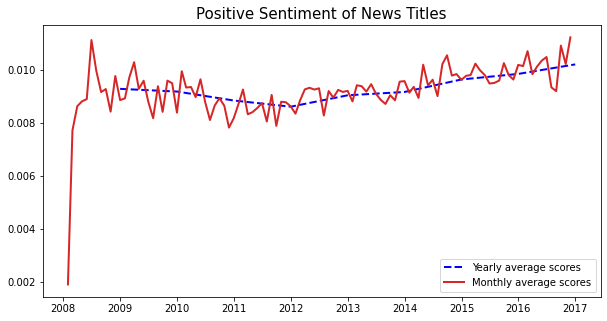

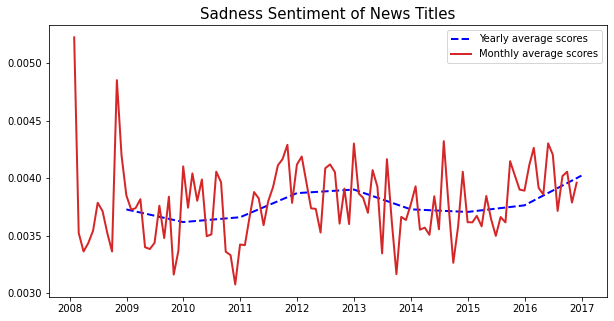

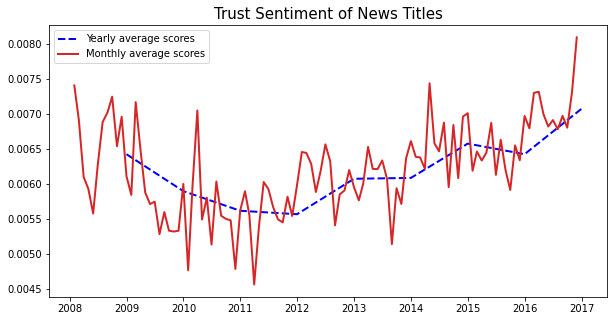

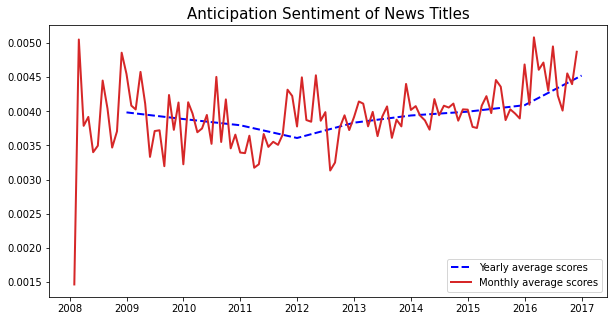

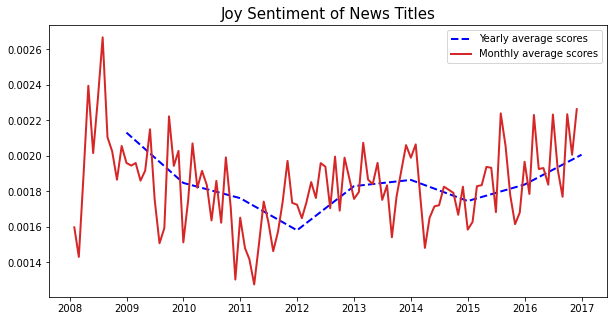

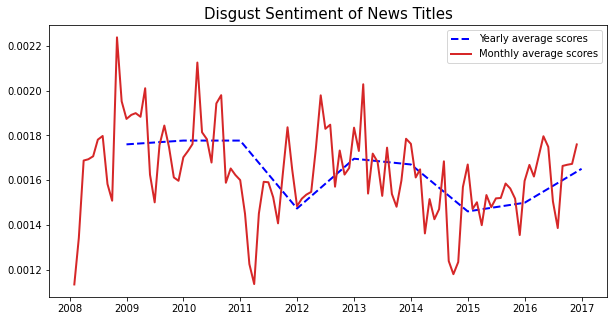

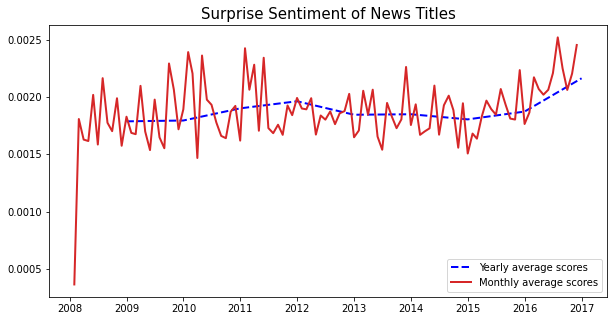

In [61]:
for emotion in emotions:
    plt.figure(figsize=(10,5))
    plt.plot(new_yearly_averages.index,new_yearly_averages[emotion], color='blue', linewidth=2, linestyle='dashed', label='Yearly average scores')
    plt.plot(new_monthly_averages.index, new_monthly_averages[emotion], color = 'tab:red', linewidth=2, label='Monthly average scores')
    plt.title('{} Sentiment of News Titles'.format(emotion.title()), fontsize=15)
    plt.legend()
    plt.show()